<h2 style="color:green" align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n

In [2]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


**Data Preprocessing: Fill NA values with median value of a column**

In [3]:
df.test_score.median()

8.0

In [4]:
import math 
median_test_score = math.floor(df.test_score.median())
median_test_score

8

In [5]:
df.test_score.fillna(median_test_score)

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     8.0
7     7.0
Name: test_score, dtype: float64

In [6]:
df.test_score = df.test_score.fillna(median_test_score)
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [7]:
# Convert words to number and fill 0 to NaN

df['experience'].fillna(0, inplace=True)
df["experience"] = df.experience.astype(str)
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score', 'interview_score']],df.salary)

LinearRegression()

In [9]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [10]:
reg.intercept_

17737.26346433768

In [11]:
reg.predict([[2, 9, 6]])

C:\Users\Mark Vincent\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [12]:
2812.95487627*2 + 1845.70596798*9 + 2205.24017467*6 + 17737.26346433768

53205.967976717686

In [13]:
reg.predict([[12, 10, 10]])

C:\Users\Mark Vincent\Anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [14]:
Predicted_Salary = reg.predict(df[['experience', 'test_score', 'interview_score']])

In [15]:
df['Predicted_Salary'] = Predicted_Salary
df

,experience,test_score,interview_score,salary,Predicted_Salary
0,0,8.0,9,50000,52350.072780
1,0,8.0,6,45000,45734.352256
2,5,6.0,7,60000,58312.954876
3,2,10.0,10,65000,63872.634643
4,7,9.0,6,70000,67270.742358
5,3,7.0,10,62000,61148.471616
6,10,8.0,7,72000,76069.141194
7,11,7.0,8,80000,79241.630277


In [16]:
reg.score(df[['experience', 'test_score', 'interview_score']], df[['salary']])

0.961678000257796

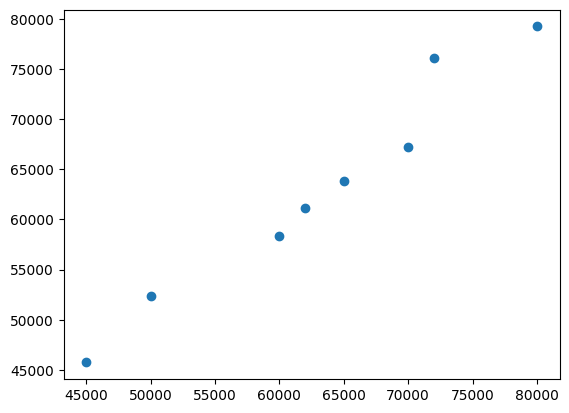

In [18]:
import matplotlib.pyplot as plt
plt.scatter(df['salary'], df['Predicted_Salary'])

<h3>Exercise<h3>

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**


<h3>Answer<h3>

53713.86 and 93747.79